In [7]:
%matplotlib inline
import numpy as np
import matplotlib
#matplotlib.use("Agg")
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import random
from copy import deepcopy

def get_image(imgname):
    return mpimg.imread(imgname) #represents each pixel as a 3-tuple of RGB values
    #return np.apply_along_axis(lambda x: 1. if x[0] == 0 else 0., 2, raw_img) #flattens to a 2d matrix

def plot_image(mtx, filename = None):
    plt.imshow(mtx)

In [8]:
plt.clf()
# plt.axis([-1., 1., -1., 1.])
face = get_image("SCUT-FBP-100.jpg")
plot_image(face)
plt.show()
x = ginput(n=3, timeout=-1)
print "clicked:", x

IOError: [Errno 2] No such file or directory: 'SCUT-FBP-100.jpg'

In [9]:
import pickle
with open("labeled_faces_100to109.txt") as f:
    labeled_face = pickle.load(f)

In [10]:
labeled_face

{'SCUT-FBP-100.jpg': [(322.71874999999983, 187.11458333333337),
  (313.6770833333332, 722.83333333333337),
  (107.97916666666669, 395.07291666666674),
  (530.67708333333303, 395.07291666666674),
  (178.05208333333331, 388.29166666666674),
  (223.26041666666657, 370.20833333333337),
  (257.16666666666657, 397.33333333333337),
  (218.7395833333332, 410.89583333333337),
  (383.74999999999983, 399.59375),
  (422.1770833333332, 370.20833333333337),
  (469.64583333333309, 388.29166666666674),
  (433.47916666666646, 413.15625),
  (261.68749999999994, 523.91666666666674),
  (318.19791666666657, 514.875),
  (376.96874999999983, 526.17708333333337),
  (241.34374999999994, 598.51041666666674),
  (320.4583333333332, 584.94791666666674),
  (397.31249999999983, 593.98958333333337),
  (324.97916666666657, 636.9375)],
 'SCUT-FBP-101.jpg': [(335.203125, 154.69270833333337),
  (264.15104166666674, 670.75520833333337),
  (84.651041666666686, 334.19270833333337),
  (481.046875, 352.89062500000006),
  (159

In [18]:
from itertools import combinations
def compute_ratios(labels):
    unit = np.linalg.norm(np.array(labels[0]) - np.array(labels[1]))
    num_pts = len(labels)
    distances = []
    for pt1, pt2 in combinations(labels, 2):
        distances.append(
            np.linalg.norm(np.array(pt1) - np.array(pt2))/unit
        )
    return distances

In [19]:
compute_ratios(labeled_face['SCUT-FBP-100.jpg'])

[1.0,
 0.55792047049881521,
 0.54889924393704559,
 0.46247454947063998,
 0.38888627563107719,
 0.41098210631957016,
 0.46054627827470035,
 0.41260291755078005,
 0.38888627563107731,
 0.4649502074215362,
 0.46980556967067089,
 0.63883960835862053,
 0.61178541322146573,
 0.64087019242735155,
 0.78269983162802714,
 0.7425222726913544,
 0.77204194670019444,
 0.83955348188513157,
 0.72221762049876859,
 0.73364824248670779,
 0.67374252100073928,
 0.67942466067852791,
 0.61659585004187878,
 0.60856220523455073,
 0.61730264958269065,
 0.68858398488848493,
 0.68890700596216425,
 0.61971984242919942,
 0.38372608218536303,
 0.38822207997014552,
 0.38557693620034267,
 0.26845017770285495,
 0.25765835117882024,
 0.28669279041106899,
 0.16169653194652869,
 0.78891718050784831,
 0.13139404252598261,
 0.22010700674948727,
 0.27847331666231012,
 0.20882036454126715,
 0.51476378728172678,
 0.58824775282703801,
 0.67512799586715011,
 0.60844520778941757,
 0.37433456726269998,
 0.45158989602361571,
 0.558

In [13]:
labeled_face['SCUT-FBP-100.jpg']

[(322.71874999999983, 187.11458333333337),
 (313.6770833333332, 722.83333333333337),
 (107.97916666666669, 395.07291666666674),
 (530.67708333333303, 395.07291666666674),
 (178.05208333333331, 388.29166666666674),
 (223.26041666666657, 370.20833333333337),
 (257.16666666666657, 397.33333333333337),
 (218.7395833333332, 410.89583333333337),
 (383.74999999999983, 399.59375),
 (422.1770833333332, 370.20833333333337),
 (469.64583333333309, 388.29166666666674),
 (433.47916666666646, 413.15625),
 (261.68749999999994, 523.91666666666674),
 (318.19791666666657, 514.875),
 (376.96874999999983, 526.17708333333337),
 (241.34374999999994, 598.51041666666674),
 (320.4583333333332, 584.94791666666674),
 (397.31249999999983, 593.98958333333337),
 (324.97916666666657, 636.9375)]

In [25]:
features = []
for img_name in labeled_face:
    features.append(compute_ratios(labeled_face[img_name]))
features = np.array(features)

Automatically created module for IPython interactive environment


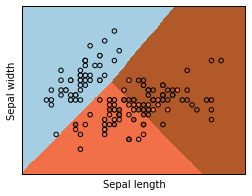

In [52]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [53]:
X

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6],
       [ 5.4,  3.9],
       [ 4.6,  3.4],
       [ 5. ,  3.4],
       [ 4.4,  2.9],
       [ 4.9,  3.1],
       [ 5.4,  3.7],
       [ 4.8,  3.4],
       [ 4.8,  3. ],
       [ 4.3,  3. ],
       [ 5.8,  4. ],
       [ 5.7,  4.4],
       [ 5.4,  3.9],
       [ 5.1,  3.5],
       [ 5.7,  3.8],
       [ 5.1,  3.8],
       [ 5.4,  3.4],
       [ 5.1,  3.7],
       [ 4.6,  3.6],
       [ 5.1,  3.3],
       [ 4.8,  3.4],
       [ 5. ,  3. ],
       [ 5. ,  3.4],
       [ 5.2,  3.5],
       [ 5.2,  3.4],
       [ 4.7,  3.2],
       [ 4.8,  3.1],
       [ 5.4,  3.4],
       [ 5.2,  4.1],
       [ 5.5,  4.2],
       [ 4.9,  3.1],
       [ 5. ,  3.2],
       [ 5.5,  3.5],
       [ 4.9,  3.1],
       [ 4.4,  3. ],
       [ 5.1,  3.4],
       [ 5. ,  3.5],
       [ 4.5,  2.3],
       [ 4.4,  3.2],
       [ 5. ,  3.5],
       [ 5.1,  3.8],
       [ 4.8,  3. ],
       [ 5.1,  3.8],
       [ 4.6,

In [56]:
average_ratings = [2.44, 3.1333333333333333, 2.36, 2.5733333333333333, 2.36, 2.48, 2.6666666666666665, 2.08, 2.84, 3.066666666666667, 2.48, 2.4133333333333336, 2.6533333333333333, 2.16, 2.0, 2.466666666666667, 2.1866666666666665, 2.453333333333333, 2.8933333333333335, 3.2133333333333334, 2.6933333333333334, 2.506666666666667, 2.453333333333333, 2.493333333333333, 2.013333333333333, 2.6666666666666665, 2.1333333333333333, 2.6, 2.32, 2.3466666666666667, 2.32, 2.76, 2.76, 2.973333333333333, 3.56, 3.1066666666666665, 3.4133333333333336, 3.026666666666667, 3.7733333333333334, 4.346666666666667, 2.76, 3.48, 2.92, 2.48, 3.1466666666666665, 3.8933333333333335, 3.6133333333333333, 3.8666666666666667, 3.56, 3.84, 3.3333333333333335, 3.7333333333333334, 3.533333333333333, 3.1466666666666665, 2.466666666666667, 3.28, 3.8666666666666667, 3.92, 2.5733333333333333, 2.6266666666666665, 2.36, 2.2933333333333334, 2.1466666666666665, 2.466666666666667, 2.1733333333333333, 2.36, 2.48, 2.44, 2.72, 3.2666666666666666, 2.3866666666666667, 2.8266666666666667, 2.32, 2.2666666666666666, 2.0, 2.76, 2.7733333333333334, 2.92, 2.5733333333333333, 2.453333333333333, 2.72, 2.6533333333333333, 2.88, 2.533333333333333, 2.7733333333333334, 2.28, 2.88, 2.7866666666666666, 2.973333333333333, 2.92, 2.44, 2.1466666666666665, 2.453333333333333, 2.453333333333333, 2.2, 2.533333333333333, 2.6666666666666665, 2.7333333333333334, 2.64, 2.96, 3.8533333333333335, 3.8933333333333335, 3.973333333333333, 3.973333333333333, 4.44, 3.72, 4.293333333333333, 4.24, 2.986666666666667, 4.693333333333333, 4.053333333333334, 1.32, 2.0933333333333333, 1.48, 1.5866666666666667, 2.6666666666666665, 2.6533333333333333, 2.6666666666666665, 2.2133333333333334, 3.013333333333333, 2.1333333333333333, 2.1733333333333333, 3.12, 3.3333333333333335, 2.986666666666667, 2.933333333333333, 2.7066666666666666, 2.16, 2.2933333333333334, 2.1466666666666665, 2.5866666666666664, 2.5733333333333333, 4.466666666666667, 2.72, 2.9066666666666667, 2.546666666666667, 3.12, 2.3733333333333335, 2.56, 2.04, 2.453333333333333, 4.213333333333333, 2.8266666666666667, 2.1333333333333333, 3.12, 2.6666666666666665, 2.2266666666666666, 2.32, 2.7066666666666666, 2.2, 2.7333333333333334, 2.2666666666666666, 1.88, 1.44, 2.0933333333333333, 2.0533333333333332, 1.8, 2.6666666666666665, 1.1333333333333333, 1.9733333333333334, 2.013333333333333, 2.3866666666666667, 2.3333333333333335, 2.2933333333333334, 2.2933333333333334, 4.373333333333333, 4.1466666666666665, 2.5866666666666664, 4.573333333333333, 2.16, 2.36, 4.28, 2.3333333333333335, 2.16, 1.8533333333333333, 2.1066666666666665, 4.04, 2.3733333333333335, 2.973333333333333, 2.12, 2.5733333333333333, 2.4133333333333336, 3.013333333333333, 1.9066666666666667, 2.3466666666666667, 3.973333333333333, 1.9866666666666666, 4.1866666666666665, 4.36, 2.013333333333333, 2.16, 2.026666666666667, 3.9466666666666668, 4.2, 2.2133333333333334, 4.08, 2.2533333333333334, 2.24, 3.4266666666666667, 2.2933333333333334, 2.4266666666666667, 2.493333333333333, 2.546666666666667, 1.92, 2.4133333333333336, 1.88, 2.493333333333333, 2.0, 4.1466666666666665, 1.88, 2.5866666666666664, 2.64, 2.52, 2.68, 2.32, 4.293333333333333, 3.066666666666667, 2.24, 2.0, 2.3066666666666666, 2.0933333333333333, 2.48, 2.1466666666666665, 1.76, 2.3733333333333335, 2.6933333333333334, 2.76, 2.3466666666666667, 2.32, 2.493333333333333, 1.8666666666666667, 1.92, 2.56, 2.3466666666666667, 2.96, 2.1866666666666665, 2.1333333333333333, 2.1333333333333333, 2.066666666666667, 2.7466666666666666, 2.0933333333333333, 3.6666666666666665, 2.6666666666666665, 2.3866666666666667, 3.1333333333333333, 2.6, 2.013333333333333, 2.16, 2.2533333333333334, 2.5733333333333333, 2.3866666666666667, 2.04, 1.7333333333333334, 2.44, 2.32, 2.84, 2.1733333333333333, 1.92, 2.32, 2.2266666666666666, 1.9733333333333334, 1.92, 2.32, 1.68, 2.3866666666666667, 2.1066666666666665, 1.5866666666666667, 1.9333333333333333, 1.96, 2.3733333333333335, 3.1066666666666665, 2.12, 2.0, 2.0533333333333332, 2.1733333333333333, 2.6133333333333333, 2.28, 3.1733333333333333, 2.3466666666666667, 2.1733333333333333, 1.7066666666666668, 2.8133333333333335, 1.8, 2.1866666666666665, 2.1733333333333333, 1.9333333333333333, 1.7866666666666666, 2.013333333333333, 2.1333333333333333, 2.026666666666667, 2.2, 2.1333333333333333, 2.7333333333333334, 2.546666666666667, 2.8666666666666667, 2.2933333333333334, 2.2533333333333334, 2.5733333333333333, 3.1066666666666665, 2.2266666666666666, 1.8933333333333333, 2.36, 2.52, 2.32, 2.1466666666666665, 2.8266666666666667, 2.44, 2.493333333333333, 2.1333333333333333, 2.52, 3.0, 2.8666666666666667, 2.066666666666667, 2.4, 2.5866666666666664, 2.9066666666666667, 1.8266666666666667, 2.1733333333333333, 2.5733333333333333, 3.1866666666666665, 1.7866666666666666, 2.0933333333333333, 2.2533333333333334, 2.1866666666666665, 2.546666666666667, 3.3066666666666666, 2.24, 2.12, 2.0933333333333333, 2.533333333333333, 2.1466666666666665, 2.8933333333333335, 1.7866666666666666, 2.986666666666667, 2.546666666666667, 2.7866666666666666, 2.0, 2.3733333333333335, 1.6533333333333333, 2.04, 2.7733333333333334, 1.7466666666666666, 2.6666666666666665, 2.6, 2.066666666666667, 2.506666666666667, 3.5866666666666664, 1.92, 2.933333333333333, 2.013333333333333, 2.28, 1.9466666666666668, 2.5733333333333333, 2.2, 2.493333333333333, 3.2, 2.7866666666666666, 2.84, 2.0533333333333332, 2.466666666666667, 1.7333333333333334, 2.52, 2.2266666666666666, 2.8933333333333335, 2.7466666666666666, 2.5866666666666664, 1.9333333333333333, 2.066666666666667, 2.8666666666666667, 2.8533333333333335, 1.9066666666666667, 2.3866666666666667, 2.466666666666667, 1.9066666666666667, 2.36, 2.24, 2.08, 2.7866666666666666, 2.506666666666667, 3.2933333333333334, 4.466666666666667, 4.546666666666667, 2.2133333333333334, 2.16, 2.2133333333333334, 2.026666666666667, 2.1866666666666665, 2.3066666666666666, 3.28, 3.2933333333333334, 3.2133333333333334, 2.6, 2.92, 2.2, 2.4266666666666667, 2.2933333333333334, 2.1466666666666665, 2.1866666666666665, 3.0, 2.28, 1.9333333333333333, 2.52, 1.9066666666666667, 2.6133333333333333, 1.72, 1.9333333333333333, 1.8933333333333333, 2.1066666666666665, 2.2666666666666666, 1.5466666666666666, 2.1466666666666665, 1.4666666666666666, 2.1866666666666665, 1.72, 2.6266666666666665, 2.533333333333333, 3.066666666666667, 2.0, 2.2533333333333334, 2.2, 2.4, 2.48, 2.2133333333333334, 2.8133333333333335, 2.466666666666667, 2.6933333333333334, 2.1066666666666665, 2.04, 1.5333333333333334, 1.8533333333333333, 1.9066666666666667, 1.7866666666666666, 1.6933333333333334, 1.8533333333333333, 2.4266666666666667, 1.9333333333333333, 2.6, 2.2133333333333334, 2.3333333333333335, 1.48, 1.8133333333333332, 2.026666666666667, 2.4133333333333336, 1.84, 2.6666666666666665, 1.8533333333333333, 2.12, 1.8133333333333332, 2.7733333333333334, 1.8, 2.52, 2.32, 2.453333333333333, 2.44, 2.1466666666666665, 2.16, 1.92, 1.76, 1.88, 2.88, 2.1466666666666665, 2.2666666666666666, 2.0533333333333332, 2.0933333333333333, 3.7466666666666666, 3.96, 3.4, 3.533333333333333, 2.2133333333333334, 2.4133333333333336, 2.2, 2.08, 2.96, 2.36, 2.0533333333333332, 1.8666666666666667, 2.026666666666667, 2.04, 1.96, 1.8533333333333333, 1.6666666666666667, 2.48, 2.44, 2.72, 1.84, 2.1066666666666665, 1.92, 3.0533333333333332, 2.453333333333333, 2.1733333333333333, 2.506666666666667, 2.4266666666666667, 3.12, 1.9466666666666668, 2.76, 2.973333333333333, 2.2533333333333334, 2.4133333333333336, 2.8666666666666667, 3.1466666666666665]
average_ratings = map(lambda flt: int(flt), average_ratings)
min(average_ratings)

1

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

X = features[0:9]
Y = np.array(average_ratings[100:109])



In [72]:
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X, Y)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [75]:
Z = logreg.predict(features)

In [76]:
Z

array([3, 3, 3, 3, 4, 3, 4, 4, 2, 4])

In [66]:
Y

array([3, 3, 3, 3, 4, 3, 4, 4, 2, 4])

In [89]:
def leave_one_out(features, labels):
    predictions = []
    for i in xrange(len(features)):
        X = np.delete(features, i ,0)
        Y = np.delete(labels, i, 0)
        logreg = linear_model.LogisticRegression(C=1e5)
        logreg.fit(X, Y)
        Z = logreg.predict(features)
        predictions.append(Z[i])
    return np.array(predictions)

In [80]:
i = 2
X = np.delete(features, i ,0)
print X

[[ 1.          0.58146395  0.50388189 ...,  0.15775645  0.09413944
   0.18956408]
 [ 1.          0.55792047  0.54889924 ...,  0.14442874  0.09739876
   0.15700544]
 [ 1.          0.54862538  0.53520944 ...,  0.12340084  0.103514
   0.14708695]
 ..., 
 [ 1.          0.49069547  0.54634897 ...,  0.13435146  0.09587442
   0.15121218]
 [ 1.          0.56454633  0.5502027  ...,  0.1326709   0.08606161
   0.14491339]
 [ 1.          0.50587244  0.55342062 ...,  0.14452231  0.11768032
   0.16505295]]


In [90]:
labels = np.array(average_ratings[100:110])
predictions = leave_one_out(features, labels)

In [91]:
predictions

array([3, 4, 3, 4, 3, 3, 4, 4, 4, 4])

In [87]:
labels

array([3, 3, 3, 3, 4, 3, 4, 4, 2, 4])

In [94]:
sum(abs(predictions - labels))/len(labels)

0

In [95]:
abs(predictions - labels)

array([0, 1, 0, 1, 1, 0, 0, 0, 2, 0])

In [116]:
labeled_face2 = [{'SCUT-FBP-1.jpg': [(263.82812500000006, 106.796875), (245.09375000000006, 587.078125), (98.625000000000057, 321.390625), (403.48437500000006, 333.3125), (132.68750000000006, 321.390625), (173.56250000000006, 306.0625), (209.32812500000006, 328.203125), (175.26562500000006, 333.3125), (303.00000000000006, 335.015625), (342.17187500000006, 316.28125), (384.75000000000006, 338.421875), (340.46875000000006, 345.234375), (216.14062500000006, 438.90625), (253.60937500000006, 411.65625), (287.67187500000006, 444.015625), (190.59375000000006, 496.8125), (253.60937500000006, 483.1875), (309.81250000000006, 501.921875), (246.79687500000006, 520.65625)]}, {'SCUT-FBP-2.jpg': [(329.41145833333337, 141.34895833333337), (333.77604166666663, 758.9375), (122.09375, 411.953125), (547.640625, 405.40625), (189.74479166666663, 414.13541666666674), (235.57291666666663, 390.13020833333337), (281.40104166666663, 422.86458333333337), (235.57291666666663, 425.046875), (390.515625, 420.68229166666674), (440.70833333333337, 387.94791666666674), (488.71875, 414.13541666666674), (442.890625, 425.046875), (294.49479166666663, 562.53125), (333.77604166666663, 523.25), (370.875, 558.16666666666674), (261.76041666666663, 628.0), (340.32291666666663, 623.63541666666674), (418.88541666666663, 630.18229166666674), (344.6875, 665.09895833333337)]}, {'SCUT-FBP-3.jpg': [(341.87499999999994, 154.08333333333348), (341.87499999999994, 761.375), (107.79166666666663, 408.04166666666674), (569.33333333333326, 397.00000000000011), (167.41666666666657, 412.45833333333337), (224.83333333333331, 383.75000000000011), (271.20833333333331, 419.08333333333337), (220.41666666666657, 427.91666666666674), (401.49999999999994, 412.45833333333337), (458.91666666666657, 370.50000000000011), (516.33333333333326, 394.79166666666674), (456.7083333333332, 412.45833333333337), (293.29166666666657, 564.83333333333337), (339.66666666666657, 536.125), (374.99999999999994, 567.04166666666674), (255.74999999999994, 635.5), (335.24999999999994, 622.25), (425.79166666666657, 631.08333333333337), (341.87499999999994, 677.45833333333337)]}, {'SCUT-FBP-4.jpg': [(339.74999999999994, 91.75), (346.49999999999994, 748.75), (96.750000000000057, 373.0), (573.75, 355.0), (168.75000000000006, 373.0), (222.75000000000006, 343.75), (276.75000000000006, 382.0), (227.25000000000006, 391.0), (400.49999999999994, 377.5), (456.74999999999994, 343.75), (510.74999999999994, 370.75), (456.74999999999994, 384.25), (285.75000000000006, 523.75), (339.74999999999994, 485.5), (373.49999999999994, 526.0), (254.25000000000006, 591.25), (344.24999999999994, 591.25), (420.74999999999994, 595.75), (339.74999999999994, 638.5)]}, {'SCUT-FBP-5.jpg': [(283.64062499999989, 137.171875), (294.07031249999989, 727.4921875), (91.734374999999886, 389.5703125), (515.17968749999977, 385.3984375), (152.22656249999989, 393.7421875), (210.63281249999989, 372.8828125), (256.52343749999989, 406.2578125), (206.46093749999989, 414.6015625), (362.90624999999989, 404.171875), (419.22656249999989, 372.8828125), (465.11718749999977, 402.0859375), (423.39843749999977, 416.6875), (262.78124999999989, 541.84375), (302.41406249999989, 510.5546875), (342.04687499999989, 539.7578125), (221.06249999999989, 591.90625), (300.32812499999989, 591.90625), (385.85156249999989, 600.25), (306.58593749999989, 639.8828125)]}, {'SCUT-FBP-6.jpg': [(300.34895833333343, 133.70312500000011), (323.78125000000006, 721.640625), (97.979166666666742, 382.93750000000011), (532.54166666666674, 372.28645833333337), (168.27604166666669, 387.19791666666674), (208.75000000000006, 365.89583333333337), (270.52604166666669, 399.97916666666674), (210.88020833333343, 408.50000000000006), (370.64583333333343, 395.71875000000011), (421.77083333333343, 365.89583333333337), (470.76562500000006, 385.06770833333337), (426.03125000000006, 408.50000000000006), (259.87500000000006, 540.57291666666674), (321.65104166666669, 515.01041666666674), (368.51562500000006, 546.96354166666674), (230.05208333333343, 585.30729166666674), (319.52083333333343, 589.56770833333337), (417.51041666666669, 589.56770833333337), (313.13020833333343, 627.91145833333337)]}, {'SCUT-FBP-7.jpg': [(334.98437499999989, 72.546875), (328.53906249999989, 719.2265625), (87.914062500000057, 373.328125), (554.12499999999989, 347.546875), (156.6640625, 373.328125), (206.078125, 341.1015625), (257.640625, 381.921875), (208.2265625, 386.21875), (395.14062499999989, 373.328125), (446.70312499999989, 336.8046875), (498.26562499999989, 362.5859375), (444.55468749999989, 377.625), (281.2734375, 525.8671875), (330.68749999999989, 497.9375), (373.65624999999989, 525.8671875), (236.15625, 586.0234375), (332.83593749999989, 594.6171875), (420.92187499999989, 588.171875), (330.68749999999989, 635.4375)]}, {'SCUT-FBP-8.jpg': [(317.79687499999989, 164.9296875), (302.75781249999989, 753.6015625), (100.8046875, 409.8515625), (528.34374999999989, 409.8515625), (160.9609375, 412.0), (208.2265625, 390.515625), (251.1953125, 433.484375), (203.9296875, 429.1875), (373.65624999999989, 431.3359375), (425.21874999999989, 390.515625), (466.03906249999989, 416.296875), (425.21874999999989, 431.3359375), (266.234375, 575.28125), (307.05468749999989, 545.203125), (341.42968749999989, 575.28125), (231.859375, 624.6953125), (309.20312499999989, 624.6953125), (392.99218749999989, 624.6953125), (307.05468749999989, 680.5546875)]}, {'SCUT-FBP-9.jpg': [(311.20833333333326, 115.22916666666674), (307.0, 733.85416666666674), (81.854166666666686, 374.04166666666674), (540.56249999999989, 371.9375), (161.8125, 376.14583333333337), (199.6875, 363.52083333333337), (248.08333333333326, 395.08333333333337), (203.89583333333337, 397.18750000000006), (370.12499999999989, 392.97916666666674), (420.62499999999989, 361.41666666666674), (471.12499999999989, 382.45833333333337), (420.62499999999989, 397.18750000000006), (262.8125, 527.64583333333337), (307.0, 506.60416666666669), (353.29166666666663, 529.75), (231.25, 603.39583333333337), (313.3125, 597.08333333333337), (389.06249999999989, 605.5), (309.10416666666663, 647.58333333333337)]}, {'SCUT-FBP-10.jpg': [(350.88802083333343, 157.10937500000011), (350.88802083333343, 813.81510416666674), (109.69791666666669, 441.28385416666674), (580.13802083333348, 436.50781250000011), (178.95052083333343, 446.05989583333337), (221.93489583333343, 424.56770833333337), (276.85937500000006, 460.38802083333337), (219.54687500000006, 460.38802083333337), (415.36458333333343, 458.00000000000011), (460.73697916666669, 417.40364583333337), (515.66145833333348, 438.89583333333337), (467.90104166666669, 455.61197916666674), (298.35156250000006, 608.4453125), (343.72395833333343, 575.01302083333337), (384.32031250000006, 610.83333333333337), (257.75520833333343, 658.59375), (346.11197916666669, 663.36979166666674), (434.46875000000006, 668.14583333333337), (350.88802083333343, 706.35416666666674)]}]

In [117]:
features = []
for img_dict in labeled_face2:
    for img_name in img_dict:
        features.append(compute_ratios(img_dict[img_name]))
features = np.array(features)

In [118]:
len(features)

10

In [119]:
labels = np.array(average_ratings[0:10])
predictions = leave_one_out(features, labels)

In [120]:
predictions

array([3, 2, 2, 3, 2, 2, 2, 2, 2, 2])

In [121]:
labels

array([2, 3, 2, 2, 2, 2, 2, 2, 2, 3])

In [122]:
predictions - labels

array([ 1, -1,  0,  1,  0,  0,  0,  0,  0, -1])